In [7]:
import os
import warnings

import pandas

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from soma.generators.dc2 import DC2Generator
from soma.util.plot import plot_errors, lock_axes

plt.style.use('seaborn')
plt.style.use('seaborn-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (4.77, 4.77),
    'text.usetex': True,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
})

In [2]:
plot_dir = os.path.expanduser('~/Plots/by_dataset')
os.makedirs(plot_dir, exist_ok=True)

# DC2 MAG Filtered

In [3]:
dc2 = DC2Generator()
dc2_abs = DC2Generator(abs_mag=22)

In [4]:
#dc2_mag_sample = stat_errors_vs_sample_size(dc2_abs, dc2, tests, samples, repeat=repeat)
#dc2_mag_sample.to_csv('../../results/sample_size/dc2_mag_power_samples.csv')
dc2_mag_sample = pandas.read_csv('../../results/sample_size/dc2_mag_power_samples.csv', index_col=[0, 1])

In [5]:
#dc2_mag_dim = stat_errors_vs_dimension(dc2_abs, dc2, tests, alpha=significance, samples=samples, repeat=repeat, step=10)
#dc2_mag_dim.to_csv('../results/dimensionality/dc2_mag_dim.csv')
dc2_mag_dim = pandas.read_csv('../../results/dimensionality/dc2_mag_dim.csv', index_col=[0, 1])

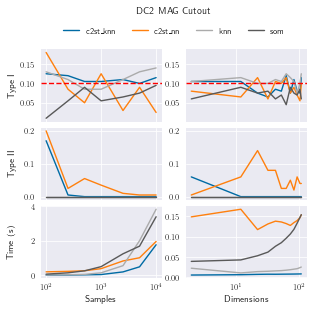

In [8]:
gs = GridSpec(nrows=4, ncols=2, height_ratios=[0.1, 0.3, 0.3, 0.3], hspace=0.1)

fig = plt.figure()

axes_samples = [fig.add_subplot(gs[1+i, 0]) for i in range(3)]
_ = plot_errors(dc2_mag_sample, logscale=True, show_time=True, legend=False, fig=fig, axes=axes_samples)

axes_dim = [fig.add_subplot(gs[1+i, 1]) for i in range(3)]
_ = plot_errors(dc2_mag_dim, logscale=True, show_time=True, legend=False, fig=fig, axes=axes_dim)

for ax in axes_dim:
    ax.set_ylabel(None)

lock_axes(axes_samples[0], axes_dim[0])
lock_axes(axes_samples[1], axes_dim[1])

ax_legend = fig.add_subplot(gs[0, :])
ax_legend.legend(handles=axes_dim[0].get_legend_handles_labels()[0], loc='center', ncol=4)
ax_legend.set_axis_off()

ax_legend.set_title('DC2 MAG Cutout')
fig.savefig(os.path.join(plot_dir, 'dc2_mag.eps'))